In [1]:
import os
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras

In [2]:
DATA_FILE = './jena_climate_2009_2016.csv'

In [3]:
df_data = pd.read_csv(DATA_FILE)
df_data = df_data[5::6]
df_data['Date Time'] = pd.to_datetime(df_data['Date Time'], format='%d.%m.%Y %H:%M:%S')
df_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [4]:
df_plot = df_data[['Date Time', 'T (degC)', 'p (mbar)', 'rho (g/m**3)']]
# _ = df_plot.plot(x='Date Time', subplots=True, figsize=(12, 6))
# _ = df_plot[:480].plot(x='Date Time', subplots=True,  figsize=(12, 6))

In [5]:
df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [6]:
df_data.loc[df_data['wv (m/s)'] == -9999.0, 'wv (m/s)'] = 0.0
df_data.loc[df_data['max. wv (m/s)'] == -9999.0, 'max. wv (m/s)'] = 0.0
print(f"df_data['wv (m/s)'].min() = {df_data['wv (m/s)'].min()}")
print(f"df_data['max. wv (m/s)'].min() = {df_data['max. wv (m/s)'].min()}")

df_data['wv (m/s)'].min() = 0.0
df_data['max. wv (m/s)'].min() = 0.0


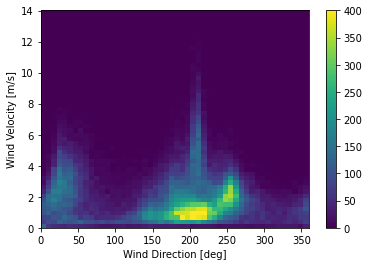

In [7]:
plt.figure()
plt.hist2d(df_data['wd (deg)'], df_data['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')
plt.show()

In [8]:
# Convert to radians.
wd_rad = df_data['wd (deg)'] * np.pi / 180

# Calculate the wind x and y components.
df_data['Wx'] = df_data['wv (m/s)'] * np.cos(wd_rad)
df_data['Wy'] = df_data['wv (m/s)'] * np.sin(wd_rad)

# Calculate the max wind x and y components.
df_data['max Wx'] = df_data['max. wv (m/s)'] * np.cos(wd_rad)
df_data['max Wy'] = df_data['max. wv (m/s)'] * np.sin(wd_rad)

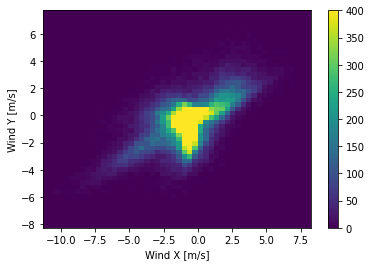

In [9]:
plt.figure()
plt.hist2d(df_data['Wx'], df_data['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')
plt.show()

In [10]:
sec_timestamp = df_data['Date Time'].map(datetime.datetime.timestamp)

sec_per_day = 24 * 60 * 60
sec_per_year = 365.2425 * sec_per_day

df_data['Day sin'] = np.sin(sec_timestamp * (2 * np.pi / sec_per_day))
df_data['Day cos'] = np.cos(sec_timestamp * (2 * np.pi / sec_per_day))
df_data['Year sin'] = np.sin(sec_timestamp * (2 * np.pi / sec_per_year))
df_data['Year cos'] = np.cos(sec_timestamp * (2 * np.pi / sec_per_year))

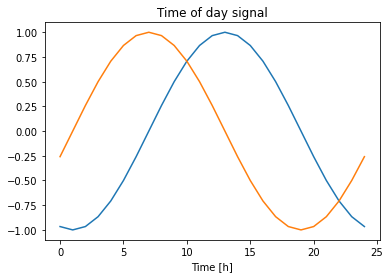

In [11]:
plt.figure()
plt.plot(np.array(df_data['Day sin'])[:25])
plt.plot(np.array(df_data['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.show()

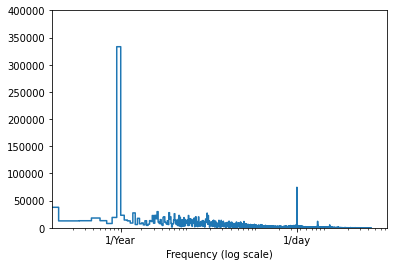

In [12]:
fft = tf.signal.rfft(df_data['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_data['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [13]:
feature_columns = [
    'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)','rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
    'H2OC (mmol/mol)', 'rho (g/m**3)', 'Wx', 'Wy', 'max Wx', 'max Wy', 'Day sin', 'Day cos', 'Year sin', 'Year cos'
]
num_features = len(feature_columns)
n = len(df_data)
df_train = df_data[0:int(n * 0.7)][feature_columns]
df_val = df_data[int(n * 0.7):int(n * 0.9)][feature_columns]
df_test = df_data[int(n * 0.9):][feature_columns]

train_mean = df_train.mean()
train_std = df_train.std()
df_train = (df_train - train_mean) / train_std
df_val = (df_val - train_mean) / train_std
df_test = (df_test - train_mean) / train_std

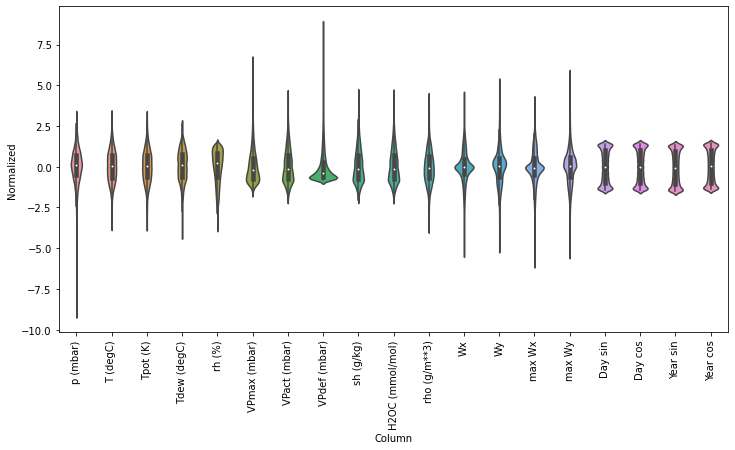

In [14]:
df_std = (df_data[feature_columns] - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(feature_columns, rotation=90)